In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [9]:
import pandas as pd

# Load CSV file
df = pd.read_csv("C:/Users/gunde/Downloads/archive (6)/breast-cancer.csv")

# Drop any irrelevant columns (like ID)
df.drop(columns=['id'], inplace=True, errors='ignore')

# Encode target if needed
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # if it's M/B type

# Split features and labels
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
# Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)


SVC()

In [17]:
print("Linear Kernel:")
print(confusion_matrix(y_test, svm_linear.predict(X_test)))
print(classification_report(y_test, svm_linear.predict(X_test)))

print("RBF Kernel:")
print(confusion_matrix(y_test, svm_rbf.predict(X_test)))
print(classification_report(y_test, svm_rbf.predict(X_test)))


Linear Kernel:
[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF Kernel:
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [19]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01,

In [21]:
scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.9789318428815401


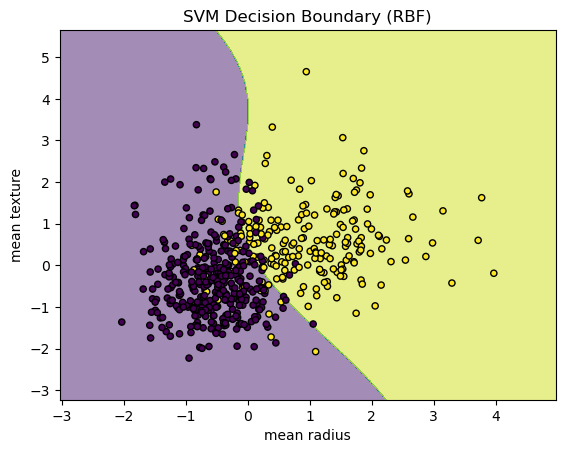

In [23]:
feature_indices = [0, 1]
X_2d = X_scaled[:, feature_indices]

model = SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(X_2d, y)

# Create meshgrid
x_min, x_max = X_2d[:, 0].min()-1, X_2d[:, 0].max()+1
y_min, y_max = X_2d[:, 1].min()-1, X_2d[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel(data.feature_names[feature_indices[0]])
plt.ylabel(data.feature_names[feature_indices[1]])
plt.title("SVM Decision Boundary (RBF)")
plt.show()
